# Random Forest Regression

Objective: Prediction using Random Forest Regression  
Dataset: concrete.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('concrete.csv')
print(data.shape)
data.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
data.columns = ['Cement','BlastFurnace','FlyAsh','Water','Superplasticizer','CoarseAgg','FineAgg','AgeDay','ConcreteStrength']
data.head()

,Cement,BlastFurnace,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,AgeDay,ConcreteStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Check Null

In [3]:
data.isnull().sum()

Cement              0
BlastFurnace        0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAgg           0
FineAgg             0
AgeDay              0
ConcreteStrength    0
dtype: int64

## Correlation

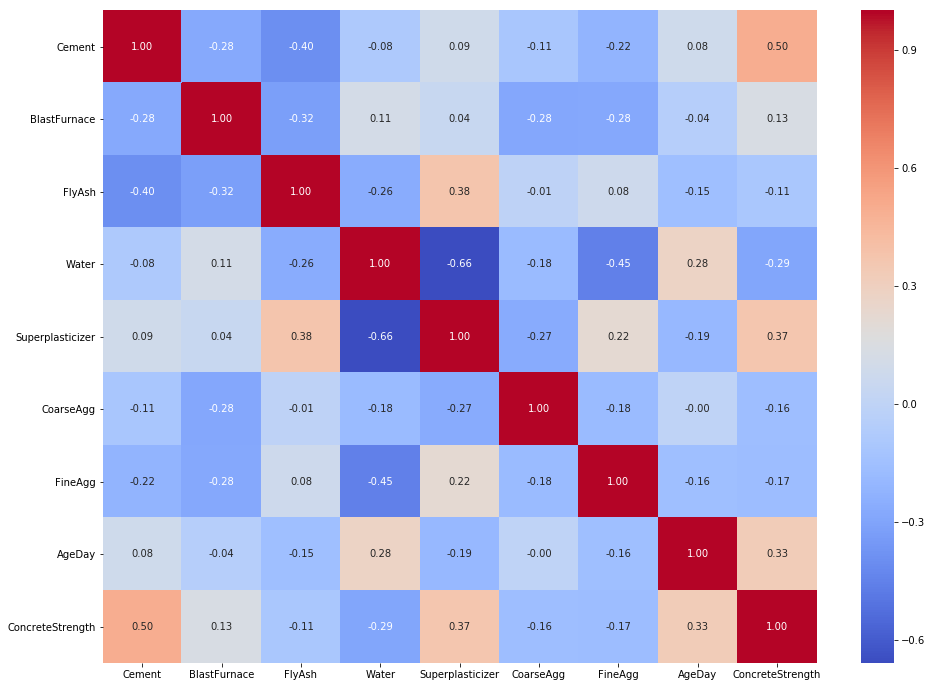

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Data Processing and Selection

In [5]:
X = data.iloc[:, 0:8].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1030, 8)


array([[ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. ,  162. ,    2.5, 1055. ,  676. ,   28. ]])

In [6]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1030,)


array([79.99, 61.89, 40.27, 41.05, 44.3 ])

## Data Normalization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1030, 8)


array([[ 2.47791487, -0.85688789, -0.84714393, -0.91676439, -0.62044832,
         0.86315424, -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, -0.91676439, -0.62044832,
         1.05616419, -1.21767004, -0.27973311]])

## Split Train Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (824, 8) (824,)
X TEST Set :  (206, 8) (206,)


## Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

R-Square               : 0.8971
Mean Absolute Error    : 3.5157
Mean Squared Error     : 26.8326
Root Mean Squared Error: 5.18
Accuracy score         : 0.8971


## Data Prediction

In [11]:
df_pred1 = data[data.index == 0]
df_pred2 = data[data.index == 4]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Cement,BlastFurnace,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,AgeDay,ConcreteStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
Xp = df_pred.iloc[:, 0:8].values
Xp = scaler.transform(Xp)

yp = df_pred.iloc[:, -1].values

## Prediction using RF Regressor

In [13]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([73.62495, 42.8545 ])